# Supermarket Sales Analysis

### Setup and Cleaning

In [67]:
# Import Libraries

import pandas as pd
import matplotlib.pyplot as plt

In [68]:
# Reading the data

df = pd.read_csv("./supermarket_sales.csv")

df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [69]:
# Remove unwanted collumns

sales = df.drop(columns=['City', 'Customer type', 'Tax 5%', 'Total', 'Payment', 'gross margin percentage', 'gross income', 'cogs'])
sales.head()

,Invoice ID,Branch,Gender,Product line,Unit price,Quantity,Date,Time,Rating
0,750-67-8428,A,Female,Health and beauty,74.69,7,1/5/2019,13:08,9.1
1,226-31-3081,C,Female,Electronic accessories,15.28,5,3/8/2019,10:29,9.6
2,631-41-3108,A,Male,Home and lifestyle,46.33,7,3/3/2019,13:23,7.4
3,123-19-1176,A,Male,Health and beauty,58.22,8,1/27/2019,20:33,8.4
4,373-73-7910,A,Male,Sports and travel,86.31,7,2/8/2019,10:37,5.3


### What was the best month for sales?

In [70]:
# Add month collumn

sales['Month'] = sales['Date'].str[0]
sales['Month'] = sales['Month'].astype('int32')
sales.head()

,Invoice ID,Branch,Gender,Product line,Unit price,Quantity,Date,Time,Rating,Month
0,750-67-8428,A,Female,Health and beauty,74.69,7,1/5/2019,13:08,9.1,1
1,226-31-3081,C,Female,Electronic accessories,15.28,5,3/8/2019,10:29,9.6,3
2,631-41-3108,A,Male,Home and lifestyle,46.33,7,3/3/2019,13:23,7.4,3
3,123-19-1176,A,Male,Health and beauty,58.22,8,1/27/2019,20:33,8.4,1
4,373-73-7910,A,Male,Sports and travel,86.31,7,2/8/2019,10:37,5.3,2


In [71]:
# Add total sales collumn

sales['Total'] = sales['Unit price'] * sales['Quantity']
sales.head()

,Invoice ID,Branch,Gender,Product line,Unit price,Quantity,Date,Time,Rating,Month,Total
0,750-67-8428,A,Female,Health and beauty,74.69,7,1/5/2019,13:08,9.1,1,522.83
1,226-31-3081,C,Female,Electronic accessories,15.28,5,3/8/2019,10:29,9.6,3,76.40
2,631-41-3108,A,Male,Home and lifestyle,46.33,7,3/3/2019,13:23,7.4,3,324.31
3,123-19-1176,A,Male,Health and beauty,58.22,8,1/27/2019,20:33,8.4,1,465.76
4,373-73-7910,A,Male,Sports and travel,86.31,7,2/8/2019,10:37,5.3,2,604.17


In [72]:
# group sales by month

results = sales.groupby('Month').sum()
print(results['Total'])

Month
1    110754.16
2     92589.88
3    104243.34
Name: Total, dtype: float64


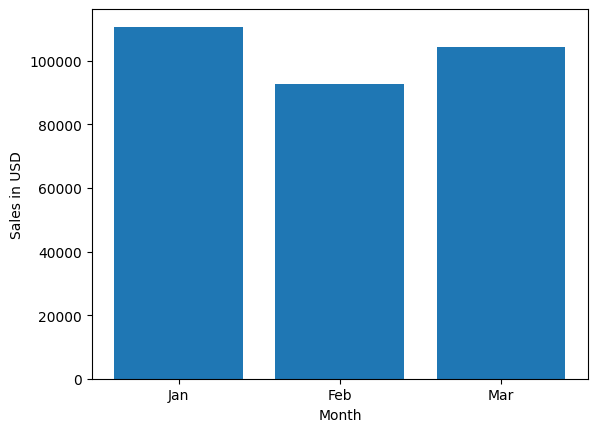

In [73]:
# plot data

months = range(1,4)
month_names = ['Jan', 'Feb', 'Mar']

plt.bar(months, results['Total'])
plt.xticks(months, month_names)
plt.xlabel('Month')
plt.ylabel('Sales in USD')
plt.show()

January had the most sales while February had the least sales. This could be due to January having 3 more days in its month and so there would be fewer shopping days in February. Also, January might see higher sales due to post-holiday shopping or new year promotions. March sales might increase as spring approaches, potentially due to seasonal promotions.

### What are the total sales by branch?

In [74]:
# group sales by Branch

results = sales.groupby('Branch').sum()
print(results['Total'])

Branch
A    101143.21
B    101140.64
C    105303.53
Name: Total, dtype: float64


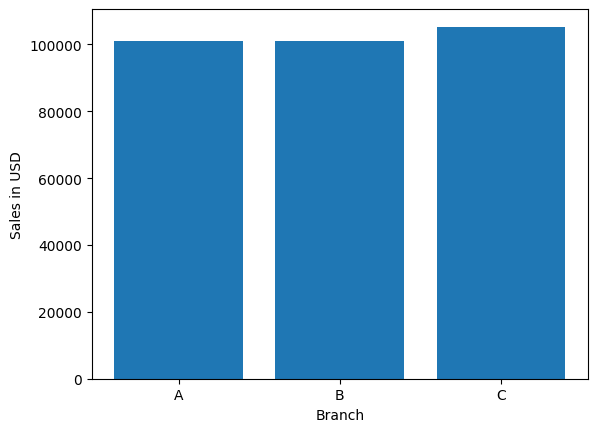

In [75]:
# plot data

branch = range(1,4)
branch_names = ['A', 'B', 'C']

plt.bar(branch, results['Total'])
plt.xticks(branch, branch_names)
plt.xlabel('Branch')
plt.ylabel('Sales in USD')
plt.show()

Branch C outperformed A and B by a notable margin ($4,160.89 more than A and $4,162.89 more than B).
Potential Factors for Success: 

- It may be situated in a more favorable area with higher foot traffic.
- Effective Marketing: Perhaps Branch C has implemented successful promotional strategies or advertising that attract more customers.
- Product Range: Branch C might have a more appealing product assortment or better stock levels compared to A and B.
- Customer Service: Excellent customer service in Branch C could lead to increased customer satisfaction and repeat business.

### Which product line generates the most revenue?

### What are the highest-selling products based on quantity sold vs. revenue generated?

### How do sales vary by customer gender across different product lines?

### Are there specific times of day with higher sales?

### What is the average rating by branch, city, and product line?

### Are there correlations between rating and quantity sold, product line, or branch?

### What is the rating trend over time? Are ratings improving, declining, or stable?